<a href="https://colab.research.google.com/github/epochee/project4/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_4_%ED%98%BC%EC%9E%90_%ED%95%B4%EB%B3%B4%EA%B8%B0_%EB%AA%A8%EB%8D%B8_%EC%84%B1%EB%8A%A5%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [247]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import cv2


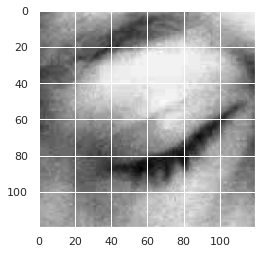

In [248]:
image_gry = cv2.imread('/content/drive/MyDrive/sample_eyes/Closed_Eyes/s0034_00046_0_0_0_0_0_02.png',cv2.IMREAD_GRAYSCALE) 
plt.imshow(image_gry,cmap='gray')

In [249]:
image_gry.shape

(120, 120)

In [250]:
image_rgb = cv2.cvtColor(image_gry,cv2.COLOR_GRAY2RGB) 

In [251]:
image_rgb.shape

(120, 120, 3)

In [360]:
import os

base_dir = '/content/drive/MyDrive/'

train_dir = os.path.join(base_dir, 'train')
train_cls_eye_dir = os.path.join(train_dir, 'Closed_Eyes')
train_opn_eye_dir = os.path.join(train_dir, 'Open_Eyes')

In [361]:
print(len(os.listdir(train_cls_eye_dir)))
print(len(os.listdir(train_cls_eye_dir)))

2000
2000


In [362]:
import tensorflow as tf
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(224, 224), shuffle=True, seed=123,
    validation_split=0.2, subset="training"
)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.


In [363]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(224, 224), shuffle=True, seed=123,
    validation_split=0.2, subset="validation"
)

Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [364]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size= 3,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [365]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [366]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

In [367]:
history = model.fit(train_data,
          validation_data = test_data, 
          callbacks=[early],
          epochs = 10)

Epoch 1/10
100/100 [==============================] - 454s 4s/step - loss: 9.3169 - accuracy: 0.8231 - val_loss: 0.1458 - val_accuracy: 0.9663
Epoch 2/10
100/100 [==============================] - 184s 2s/step - loss: 0.0819 - accuracy: 0.9787 - val_loss: 0.0831 - val_accuracy: 0.9712
Epoch 3/10
100/100 [==============================] - 186s 2s/step - loss: 0.0470 - accuracy: 0.9887 - val_loss: 0.0334 - val_accuracy: 0.9937
Epoch 4/10
100/100 [==============================] - 184s 2s/step - loss: 0.0163 - accuracy: 0.9975 - val_loss: 0.0151 - val_accuracy: 0.9987
Epoch 5/10
100/100 [==============================] - 192s 2s/step - loss: 0.0153 - accuracy: 0.9975 - val_loss: 0.0061 - val_accuracy: 0.9987
Epoch 6/10
100/100 [==============================] - 199s 2s/step - loss: 0.2298 - accuracy: 0.9266 - val_loss: 0.5036 - val_accuracy: 0.7912
Epoch 7/10
100/100 [==============================] - 194s 2s/step - loss: 5.9178 - accuracy: 0.5616 - val_loss: 0.6932 - val_accuracy: 0.4875

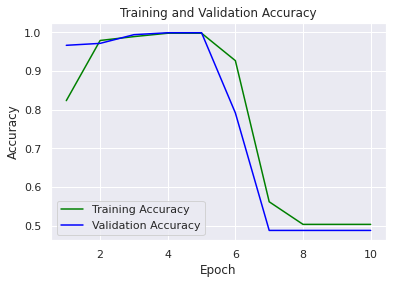

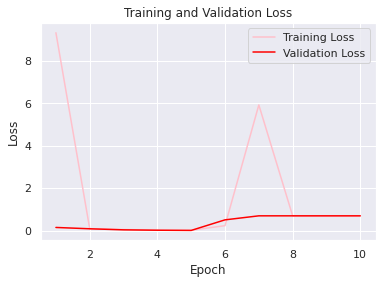

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

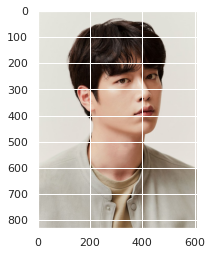

In [294]:
url = 'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMDA5MDRfMTQx%2FMDAxNTk5MTg2Mjc3NjYy.NyWpbZQ5zmSfXeFEG5AGdc_mXQEECOvm-tT5oiOQVMEg.TGCa1zmG3wDpkuu3aAiZ6fhYEfL-TZLE2KfJnLWOBXEg.JPEG.hongcha0425%2FEPA3JJ1100LBE_MDL2_H.jpg&type=sc960_832'

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import requests
from io import BytesIO

response = requests.get(url)
pic = Image.open(BytesIO(response.content))
pic
type(pic)

pic_arr = np.asarray(pic)
plt.imshow(pic_arr)

In [297]:
pic_arr_new = cv2.resize(pic_arr,(224,224))

In [369]:
!wget -O lion.jpg https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMDA5MDRfMTQx%2FMDAxNTk5MTg2Mjc3NjYy.NyWpbZQ5zmSfXeFEG5AGdc_mXQEECOvm-tT5oiOQVMEg.TGCa1zmG3wDpkuu3aAiZ6fhYEfL-TZLE2KfJnLWOBXEg.JPEG.hongcha0425%2FEPA3JJ1100LBE_MDL2_H.jpg&type=sc960_832

import cv2

img = cv2.imread('/content/lion.jpg',cv2.IMREAD_UNCHANGED) 


--2021-09-02 11:52:41--  https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMDA5MDRfMTQx%2FMDAxNTk5MTg2Mjc3NjYy.NyWpbZQ5zmSfXeFEG5AGdc_mXQEECOvm-tT5oiOQVMEg.TGCa1zmG3wDpkuu3aAiZ6fhYEfL-TZLE2KfJnLWOBXEg.JPEG.hongcha0425%2FEPA3JJ1100LBE_MDL2_H.jpg
Resolving search.pstatic.net (search.pstatic.net)... 23.56.12.210
Connecting to search.pstatic.net (search.pstatic.net)|23.56.12.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218179 (213K) [image/jpeg]
Saving to: ‘lion.jpg’

lion.jpg            100%[===================>] 213.07K  --.-KB/s    in 0.03s   

2021-09-02 11:52:42 (7.25 MB/s) - ‘lion.jpg’ saved [218179/218179]



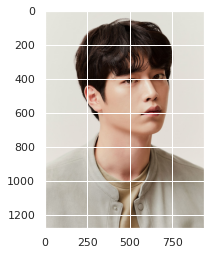

In [370]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [371]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [372]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [373]:
eyes = eyeCascade.detectMultiScale(gray, 1.1, 30)


In [374]:
for (x, y, w, h) in eyes:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)

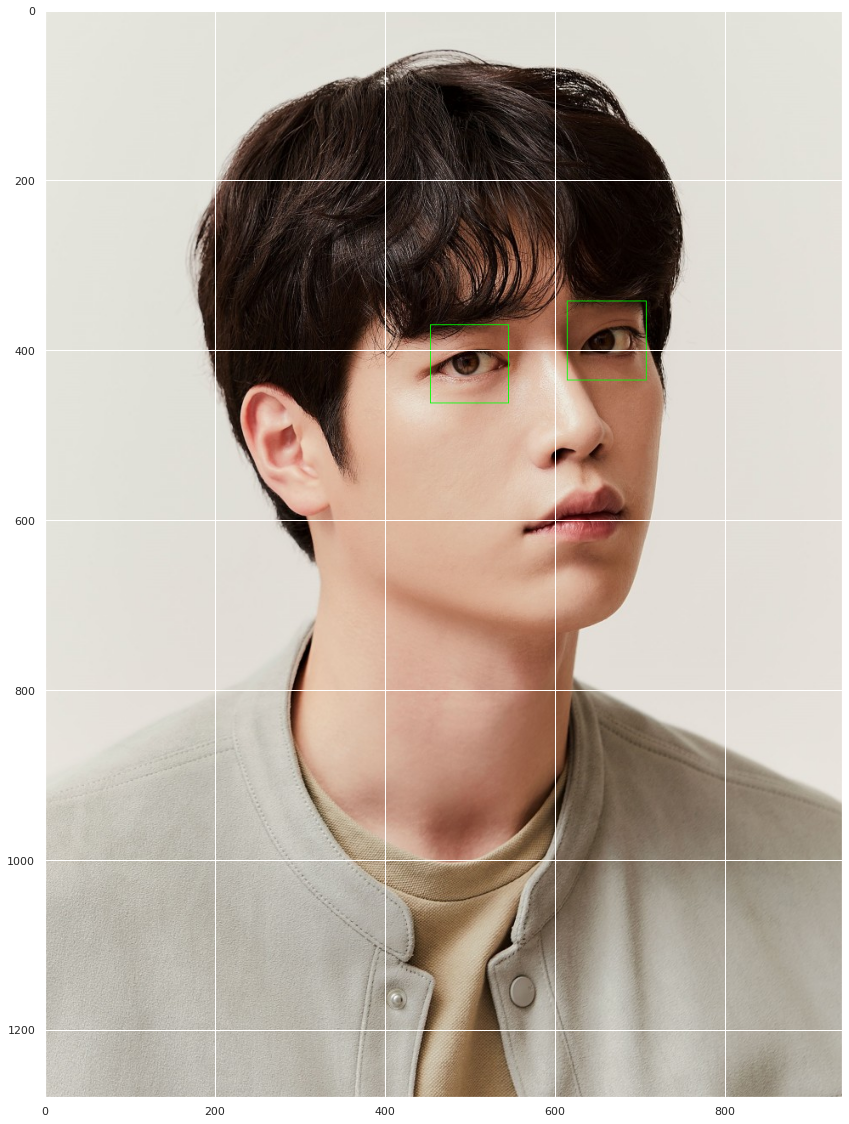

In [375]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [333]:
!wget -O lion3.jpg https://i.pinimg.com/736x/90/39/0b/90390b33d42b2e692143717c5269934b.jpg

--2021-09-02 11:02:41--  https://i.pinimg.com/736x/90/39/0b/90390b33d42b2e692143717c5269934b.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.116.84, 2a04:4e42:1c::84
Connecting to i.pinimg.com (i.pinimg.com)|151.101.116.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49136 (48K) [image/jpeg]
Saving to: ‘lion3.jpg’

lion3.jpg           100%[===================>]  47.98K  --.-KB/s    in 0.01s   

2021-09-02 11:02:42 (3.79 MB/s) - ‘lion3.jpg’ saved [49136/49136]



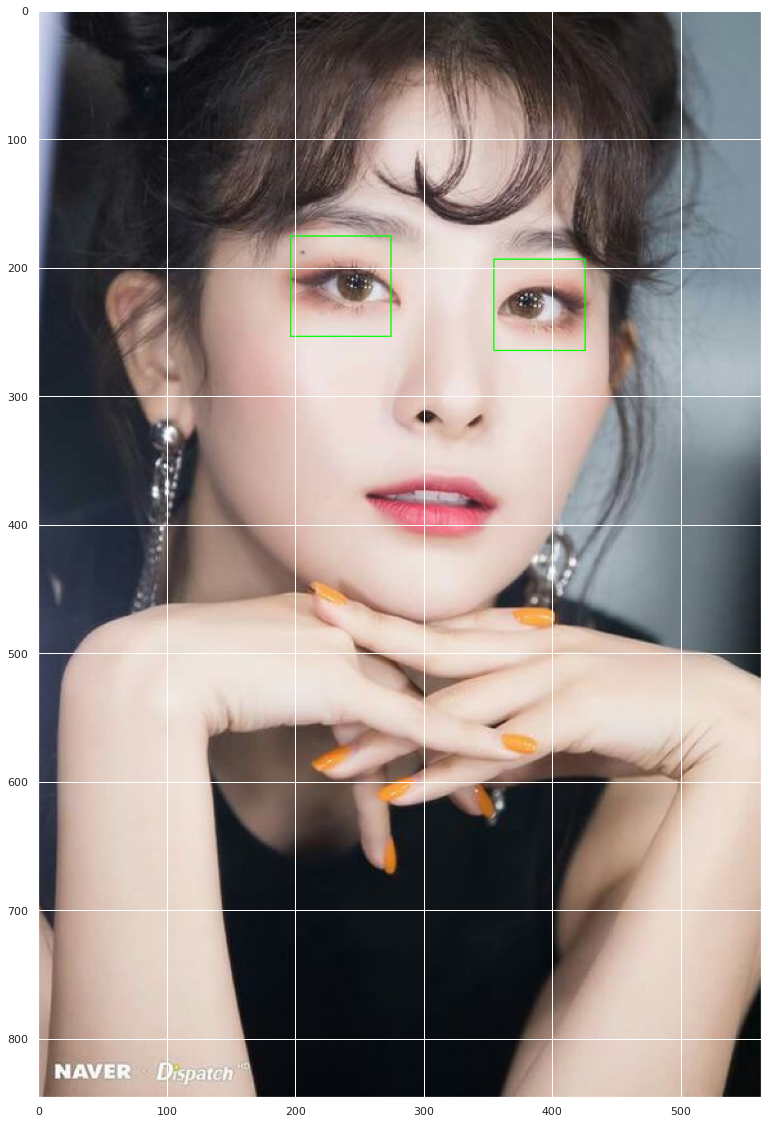

In [356]:
import cv2

img2 = cv2.imread('/content/lion3.jpg',cv2.IMREAD_UNCHANGED) 
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray2, 1.1, 30)
for (x, y, w, h) in eyes:
  cv2.rectangle(img2, (x,y), (x+w, y+h), (0, 255, 0), 1)
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [ ]:
!wget -O lion4.jpg https://i.pinimg.com/736x/90/39/0b/90390b33d42b2e692143717c5269934b.jpg

img3 = cv2.imread('/content/lion4.jpg',cv2.IMREAD_UNCHANGED) 
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray2, 1.1, 30)
for (x, y, w, h) in eyes:
  cv2.rectangle(img3, (x,y), (x+w, y+h), (0, 255, 0), 1)
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [267]:
# 예측
# image_path = '/content/drive/MyDrive/sample_eyes/Closed_Eyes/s0034_00046_0_0_0_0_0_02.png'
# new_img = image.load_img(image_path, target_size=(224, 224))
# img = image.img_to_array(new_img)
# img = np.expand_dims(img, axis=0)
# prediction = model.predict(img)
# prediction = np.argmax(prediction,axis=1)
# print(prediction)
# print(class_names[prediction[0]])
# plt.imshow(new_img)